In [58]:
#연습문제 5-1
import numpy as np

def FrobeniusNorm(a):
    return np.sqrt(np.trace(a.T @ a))

matrix_list = []

for i in range(40):
    array_list = []
    for i in range(10):
        norm = FrobeniusNorm(np.random.randint(1,10,(10,10)))
        array_list.append(norm)
    row = np.array(array_list) * np.random.randint(0,50)
    matrix_list.append(row);

result_matrix = np.array(matrix_list)

In [59]:
# 연습문제 5-2
import numpy as np

# 두 행렬사이의 프로베니우스 거리를 반환하는 함수
def FrobeniusDistance(matrix_a,matrix_b):
    return np.linalg.norm(matrix_a-matrix_b,"fro")


N = 7;

s = 1;
cnt = 0;
a = np.random.randint(1,50,(N,N))
b = np.random.randint(1,50,(N,N))

while True:

    if(FrobeniusDistance(a*s,b*s) >= 1) :
        s *= 0.9
        cnt += 1
    else:
        break;


print(s,cnt)

0.008727963568087723 45


## 연습문제 5-3
대각합 연산과 유클리드 공식의 결과가 동일하다는것을 구현합니다.
대각합 공식은 $ A^TA $ 에서만 동작하나요? 아니면 $ AA^T $에서도 결과가 동일한가요?

In [60]:
import numpy as np

def FrobeniusNorm1(a):
    return np.sqrt(np.trace(a.T @ a))

def FrobeniusNorm2(a):
    return np.sqrt(np.trace(a @ a.T))
N = 5

matrix = np.random.randint(1,10,(N,N))

# AtA
print(FrobeniusNorm1(matrix)) # AtA
print(FrobeniusNorm2(matrix)) # AAt
print(np.linalg.norm(matrix,"fro")) # 프로베니우스 노름 구하기

30.805843601498726
30.805843601498726
30.805843601498726


## 연습 문제 5-4
먼저 10 x 10 난수행렬을 만들고 프로베니우스 노름을 계산한다.
그런다음 for문 내부에 다음 단계를 코딩한다.
1. 노름의 일부만큼 행렬을 이동하고
2. 원래 행렬에서 노름의 변화율을 계산하고
3. 이동된 행렬과 원래 행렬 사이의 프로베니우스 거리를 계산하고
4. 행렬의 원소 사이의 상관계수를 계산한다.

이동시킬 값인 노름의 비율은 0에서 1 사이를 30개의 단계로 나누어 진행한다.
루프의 각 반복에서는 이전 반복에서 이동된 행렬이 아닌 원래 행렬을 사용해야 한다.


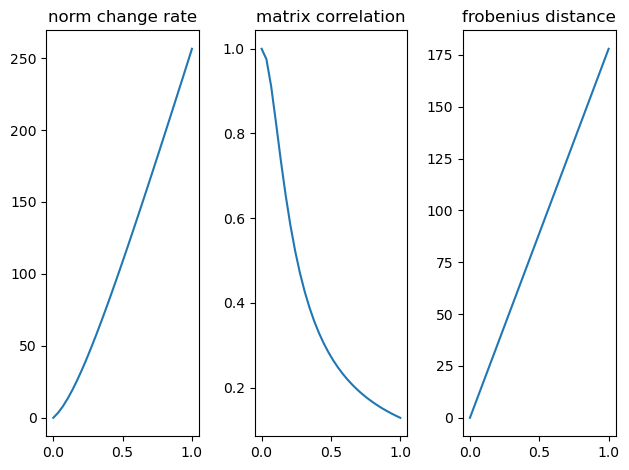

In [61]:
import numpy as np
import matplotlib.pyplot as plt
# 두 행렬사이의 프로베니우스 거리를 반환하는 함수
def FrobeniusDistance(matrix_a,matrix_b):
    return np.linalg.norm(matrix_a-matrix_b,"fro")

def ChangeRate(origin,moved):
    return ((moved - origin) / origin) * 100

N = 10;

matrix = np.random.randint(1,10,(N,N))
norm = np.linalg.norm(matrix)
ratios = np.linspace(0, 1, 30)

origin_flat = matrix.flatten();

list_norm_rateChange = []
list_corr = []
list_frobeniusDistance = []
for i in range(1,31):
    ratio = norm * ratios[i - 1];
    changedMatrix = matrix + ratio * np.eye(N) # 노름의 일부만큼 행렬을 이동(단위 행렬을 이용해 이동시킴)
    changedNorm = np.linalg.norm(changedMatrix,"fro")
    changed_flat = changedMatrix.flatten(); # 상관계수를 구하기 위한 1차원 벡터로 변환


    list_norm_rateChange.append(ChangeRate(norm,changedNorm)) #원래 행렬에서의 노름의 변화율
    list_corr.append(np.corrcoef(origin_flat,changed_flat)[0,1]) # 두 행렬의 상관계수
    list_frobeniusDistance.append(FrobeniusDistance(matrix,changedMatrix))



array_norm_rateChange = np.array(list_norm_rateChange)
array_corr = np.array(list_corr)
array_frobeniusDistance = np.array(list_frobeniusDistance)


# 1행 2열로 그래프 배치, 첫 번째 그래프
plt.subplot(1, 3, 1)  # (행, 열, 위치)
plt.plot(ratios,array_norm_rateChange)
plt.title('norm change rate')

# 1행 2열로 그래프 배치, 두 번째 그래프
plt.subplot(1, 3, 2)  # (행, 열, 위치)
plt.plot(ratios,array_corr)
plt.title('matrix correlation')

# 1행 3열로 그래프 배치, 세 번째 그래프
plt.subplot(1, 3, 3)  # (행, 열, 위치)
plt.plot(ratios,array_frobeniusDistance)
plt.title('frobenius distance')

# 그래프 보여주기
plt.tight_layout()  # 그래프 간 간격을 자동으로 조정
plt.show()




## 연습문제 5 - 5
임의의 계수(행렬 크기 등에 대한 제약 조건에 따라) 가진 난수 행렬을 만듭니다.
계수가 r인 $M \times N$ 행렬에 $r \times N$ 행렬을 곱한다.
파이썬에서 이를 구현하고 계수가 실제로 r인지 확인한다.
r > min{M,N}을 설정하면 어떻게 되고 그 이유는 무엇인가?

In [13]:
import numpy as np

M = 3
N = 3
r = 2

rand1_matrix = np.random.randint(1,5,(M,r))
rand2_matrix = np.random.randint(1,5,(r,N))

result_matrix = rand1_matrix @ rand2_matrix
print(result_matrix)
np.linalg.matrix_rank(result_matrix)

[[21 18  6]
 [13 12  4]
 [14 12  4]]


2

## 연습문제 5 - 6
더한 결과가 (1) 계수 - 0, (2) 계수 - 1,(3) 계수 - 2 가 되는 세 쌍의 계수-1 행렬을 만들어 행렬계수(r(A+B)<=r(A) + r(B))의 덧셈 법칙을 구현한다.
그런다음 덧셈 대신 행렬 곱셈에 대해서도 이 문제를 풀어보세요.

In [20]:
import numpy as np

# 행렬의 크기
M, N = 2, 2  # 계수 1을 가진 행렬이므로, 크기를 2x2로 설정

# (1) A와 B의 합이 계수 0인 경우
A1 = np.array([[1, 1], [2, 2]])  # 계수 1인 행렬
B1 = -A1  # A와 B가 완전히 반대되도록 설정
C1 = A1 + B1  # 계수 0


# (2) A와 B의 합이 계수 1인 경우
A2 = np.array([[1, 2], [2, 4]])  # 계수 1인 행렬
B2 = np.array([[1, -1], [-2, 2]])  # 계수 1인 행렬이지만 A와 특정 관계
C2 = A2 + B2  # 계수 1

# (3) A와 B의 합이 계수 2인 경우
A3 = np.array([[1, 0], [0, 0]])  # 계수 1인 행렬
B3 = np.array([[0, 0], [0, 1]])  # 계수 1인 행렬로, 다른 방향으로 독립적
C3 = A3 + B3  # 계수 2

2
